In [1]:
import os
import sys
import glob
import pandas as pd
import torch
import matplotlib.pyplot as plt

plt.style.use('bmh')

/Users/danieloliveira/opt/anaconda3/envs/vae-ssm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_name = "vrnn"
source_path = os.path.dirname(os.getcwd())
target_output_path = os.path.join(source_path, "data", "outputs", model_name)
all_output_files = glob.glob(os.path.join(target_output_path, "*.pt"))

In [36]:
model_data = torch.load(all_output_files[0])

kld_agg_df = pd.concat([model_data["train"]["eval_metrics"][["kld"]], model_data["test"]["eval_metrics"][["kld"]]], axis=1)
kld_agg_df.columns = ["train_kld", "test_kld"]
nll_agg_df = pd.concat([model_data["train"]["eval_metrics"][["nll"]], model_data["test"]["eval_metrics"][["nll"]]], axis=1)
nll_agg_df.columns = ["train_nll", "test_nll"]
mse_agg_df = pd.concat([model_data["train"]["eval_metrics"][["mse"]], model_data["test"]["eval_metrics"][["mse"]]], axis=1)
mse_agg_df.columns = ["train_mse", "test_mse"]

train_df = pd.DataFrame(model_data["train"]["outputs"].reshape(model_data["train"]["outputs"].shape[0] * model_data["train"]["outputs"].shape[1],
                                                               model_data["train"]["outputs"].shape[2]))
train_df.rename(columns={train_df.columns[0]: "true"}, inplace=True)
train_df.rename(columns={train_df.columns[-2]: "dec_mean"}, inplace=True)
train_df.rename(columns={train_df.columns[-1]: "dec_sd"}, inplace=True)

In [39]:
train_df.shape

(40400, 13)

<Axes: >

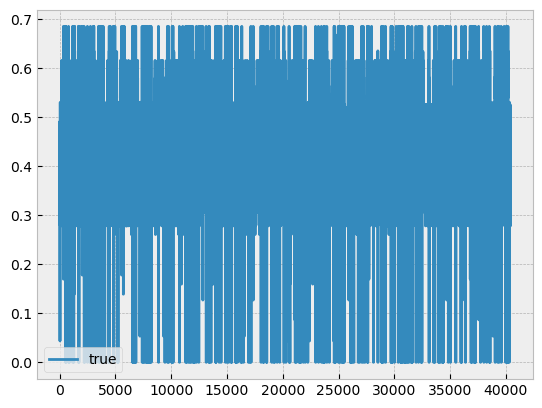

In [38]:
train_df[["true"]].plot()

<Axes: title={'center': 'Training KL-Divegence'}>

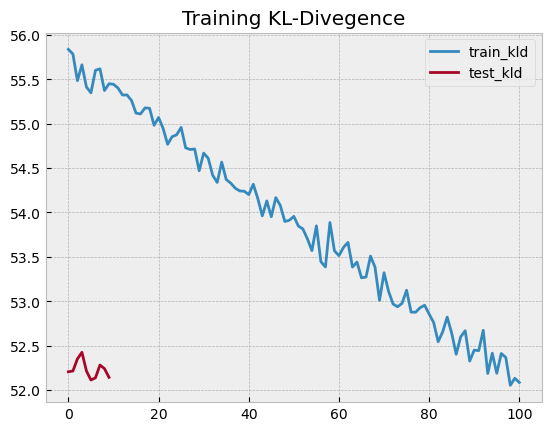

In [16]:
kld_agg_df.plot(title="Training KL-Divegence")

<Axes: title={'center': 'Training NLL'}>

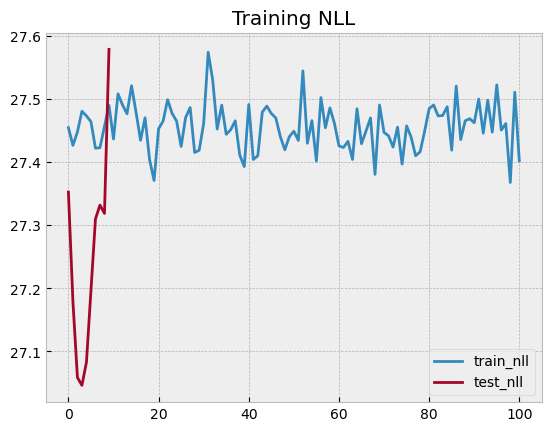

In [17]:
nll_agg_df.plot(title="Training NLL")

<Axes: title={'center': 'Training MSE'}>

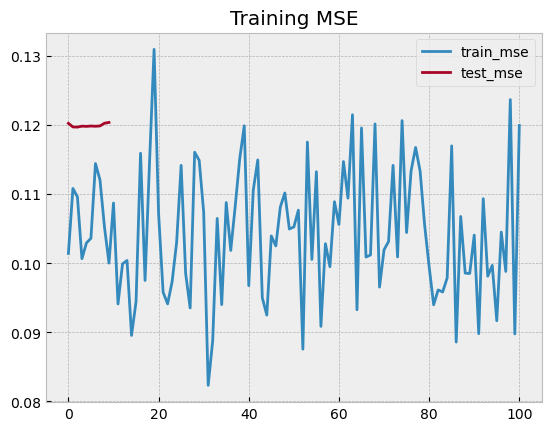

In [18]:
mse_agg_df.plot(title="Training MSE")